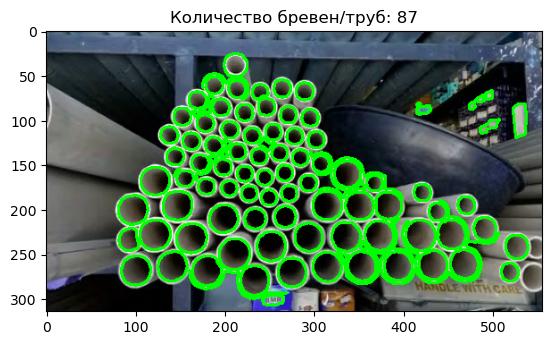

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Тут указать путь до изображения
image_path = './data/pipes-4.jpg'
image = cv2.imread(image_path)

# Конвертация изображения в грейскейл
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применим размытие для сглаживания изображения
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Используем детектор границ Канни 
edges = cv2.Canny(blurred, 50, 150)

# Поиск контуров на изображении с краями
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Фильтрация маленьких контуров, которые могут не быть бревнами
min_contour_area = 100
large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]
num_logs = len(large_contours)

# Отрисовка контуров на оригинальном изображении (для визуализации)
contour_image = image.copy()
cv2.drawContours(contour_image, large_contours, -1, (0, 255, 0), 2)

# Конвертация изображения с контурами в RGB (из BGR) для отображения в джупайтере
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

plt.imshow(contour_image_rgb)
plt.title(f'Количество бревен/труб: {num_logs}')
plt.show()